In [1]:
# fbprophet for 30 minute prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
%matplotlib inline

In [2]:
df = pd.read_csv('December-2019.csv')
df.head()

,ds,KE
0,12/1/2019 0:00,207
1,12/1/2019 0:01,206
2,12/1/2019 0:02,205
3,12/1/2019 0:03,205
4,12/1/2019 0:04,205


In [3]:
df["ds"]= pd.to_datetime(df['ds'])
df['y'] = df['KE']/52.660 
df.head()

,ds,KE,y
0,2019-12-01 00:00:00,207,3.930877
1,2019-12-01 00:01:00,206,3.911888
2,2019-12-01 00:02:00,205,3.892898
3,2019-12-01 00:03:00,205,3.892898
4,2019-12-01 00:04:00,205,3.892898


In [4]:
df.drop('KE', axis=1, inplace=True)

In [58]:
prediction_size = 30
train_df = df[:-prediction_size]

In [26]:
import time
start_time = time.time()

m = Prophet(daily_seasonality=True)
m.fit(train_df)
future = m.make_future_dataframe(periods=60, freq='1min')
forecast = m.predict(future)

print("Execution Time: %s min" % ((time.time() - start_time)/60))

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Execution Time: 5.000169332822164 min


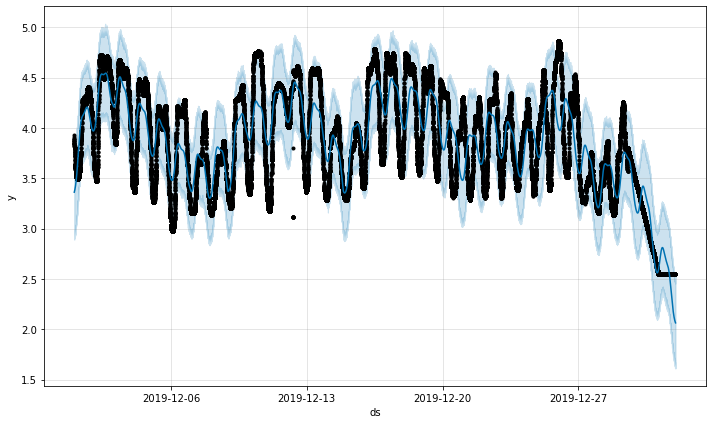

In [27]:
m.plot(forecast).savefig('1.jpeg', dpi=400)

In [28]:
forecast.to_csv('44670_inertia.csv')

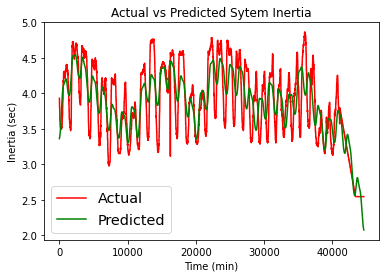

In [51]:
plt.figure()
x1 = list(range(0, 44640))
plt.plot(x1, df['y'],'r-', label='Actual')
x2 = list(range(0, 44670))
plt.plot(x2, df1['y'],'g-', label='Predicted')
plt.legend(loc='best', fontsize='x-large')
plt.title('Actual vs Predicted Sytem Inertia')
plt.xlabel('Time (min)')
plt.ylabel('Inertia (sec)')
plt.savefig('Actual vs Predicted Sytem Inertia.jpeg', dpi=300)
plt.show()

In [ ]:
#filling datetime in x-axis insted of numbers, change interval for non-conjusted date, and update cell above, after when the code works
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
x1 = list(range(0, 44640))
plt.plot(x1, df['y'],'r-', label='Actual')
plt.gcf().autofmt_xdate()
plt.show()

In [5]:
#dropping last 30 values of forcasted csv to find the error metrics
df1 = pd.read_csv('44670_inertia.csv')
df1['y'] = df1['yhat']
df1.drop(df1.tail(30).index, axis=0, inplace=True)

In [41]:
df1.head()

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
0,0,2019-12-01 00:00:00,3.432224,2.965634,3.776277,3.432224,3.432224,-0.070372,-0.070372,-0.070372,...,-0.244217,-0.244217,0.173844,0.173844,0.173844,0.0,0.0,0.0,3.361852,3.361852
1,1,2019-12-01 00:01:00,3.432514,2.890650,3.761733,3.432514,3.432514,-0.070194,-0.070194,-0.070194,...,-0.244355,-0.244355,0.174161,0.174161,0.174161,0.0,0.0,0.0,3.362319,3.362319
2,2,2019-12-01 00:02:00,3.432803,2.915076,3.790794,3.432803,3.432803,-0.070012,-0.070012,-0.070012,...,-0.244489,-0.244489,0.174477,0.174477,0.174477,0.0,0.0,0.0,3.362791,3.362791
3,3,2019-12-01 00:03:00,3.433092,2.921022,3.805317,3.433092,3.433092,-0.069826,-0.069826,-0.069826,...,-0.244619,-0.244619,0.174794,0.174794,0.174794,0.0,0.0,0.0,3.363266,3.363266
4,4,2019-12-01 00:04:00,3.433381,2.936104,3.772578,3.433381,3.433381,-0.069635,-0.069635,-0.069635,...,-0.244745,-0.244745,0.175110,0.175110,0.175110,0.0,0.0,0.0,3.363746,3.363746


In [28]:
#find error, all metrices
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(df['y'], df1['y']))
print('MSE:', metrics.mean_squared_error(df['y'], df1['y']))
print('RMSE:', np.sqrt(metrics.mean_squared_error(df['y'], df1['y'])))

MAE: 0.26927543966340145
MSE: 0.11119147814439638
RMSE: 0.33345386209248856


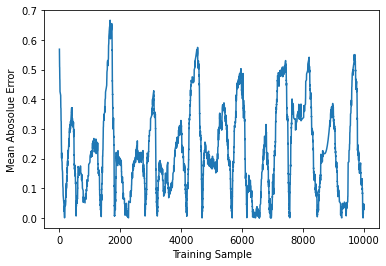

In [16]:
# MAE
expected = df['y']
predicted = df1['y']
errors = list()

for i in range(10000):
    err = abs(np.subtract(actual[i],predicted[i])).mean()
    errors.append(err)

plt.plot(errors)
#plt.xticks(ticks=[i for i in range(10000)], labels=predicted)
plt.xlabel('Training Sample')
plt.ylabel('Mean Abosolue Error')
plt.savefig('MAE_Plot.jpeg', dpi=300)
plt.show()

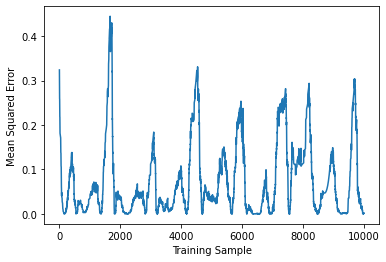

In [13]:
# MSE
expected = df['y']
predicted = df1['y']
errors = list()

for i in range(10000):
    err = np.square(np.subtract(actual[i],predicted[i])).mean()
    errors.append(err)


plt.plot(errors)
plt.xlabel('Training Sample')
plt.ylabel('Mean Squared Error')
plt.savefig('MSE_Plot.jpeg', dpi=300)
plt.show()

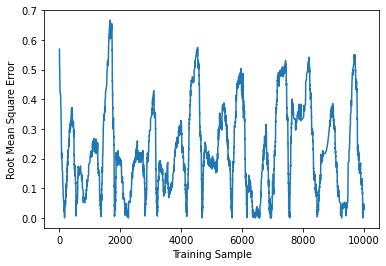

In [12]:
# RMSE
import math
actual = df['y']
predicted = df1['y']
errors = list()
for i in range(10000):
    MSE = np.square(np.subtract(actual[i],predicted[i])).mean()
    err = math.sqrt(MSE)
    errors.append(err)

plt.plot(errors)
plt.xlabel('Training Sample')
plt.ylabel('Root Mean Square Error')
plt.savefig('RMSE_Plot.jpeg', dpi=300)
plt.show()

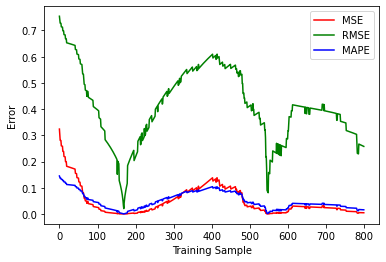

In [46]:
# Error Comparision
import math
actual = df['y']
predicted = df1['y']
MAE = list()
MSE = list()
MAPE = list()

for i in range(800):
    #MSE
    err2 = np.square(np.subtract(actual[i],predicted[i])).mean()
    MSE.append(err2)
    #RMSE
    err = math.sqrt(err2)
    errors.append(err)
    #MAPE
    err3 = abs(np.subtract(actual[i],predicted[i])/actual[i]).mean()
    MAPE.append(err3)
    

plt.figure()
plt.plot(np.arange(800),MSE,'r-',label='MSE')
plt.plot(np.arange(800),RMSE,'g-',label='RMSE')
plt.plot(np.arange(800),MAPE,'b-',label='MAPE')
#plt.plot(np.arange(800),RMSE,'b-',label='RMSE')
plt.legend()
plt.xlabel('Training Sample')
plt.ylabel('Error')
plt.savefig('All_error_plot.jpeg', dpi=300)
plt.show()

Text(0, 0.5, 'Error')

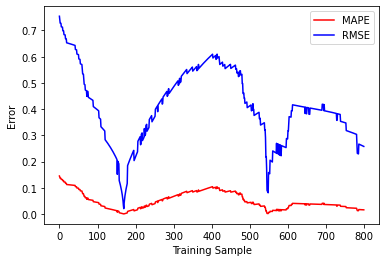

In [41]:
# Error Comparision, not completed for MASE
import math
actual = df['y']
predicted = df1['y']
MAPE = list()
MASE = list()
RMSE = list()

for i in range(800):
    #MAPE
    err1 = abs(np.subtract(actual[i],predicted[i])/actual[i]).mean()
    MAPE.append(err1)
    #MASE
    err2 = abs(np.subtract(actual[i],predicted[i]))
    #err4 = MAE/err2
    #MASE.append(err4)
    #RMSE
    err3 = math.sqrt(err2)
    RMSE.append(err3)
    

plt.figure()
plt.plot(np.arange(800),MAPE,'r-',label='MAPE')
#plt.plot(np.arange(800),MASE,'g-',label='MASE')
plt.plot(np.arange(800),RMSE,'b-',label='RMSE')
plt.legend()
plt.xlabel('Training Sample')
plt.ylabel('Error')